Данные по годам. </br>
Информация о данных отсутствует.

Задача: Подобрать параметры модели ARIMA, описать процедуру подбора в комментариях, построить прогноз на 4 года вперед.

In [81]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [82]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame

In [83]:
data = pd.read_csv('M3_152_0.csv', header=None, index_col=False)
data = data[1]
data.head()

0    5717.0
1    6374.0
2    5837.5
3    7318.4
4    4613.0
Name: 1, dtype: float64

In [84]:
data.describe()

count      38.000000
mean     5991.560526
std       967.895124
min      4342.000000
25%      5290.875000
50%      5866.200000
75%      6676.300000
max      7801.300000
Name: 1, dtype: float64

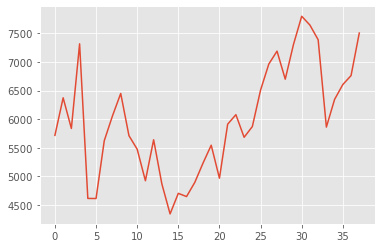

In [85]:
data.plot()
plt.show()

AutoCorrelation: быстрое убывание в геометрической прогрессии </br>
Partial AutoCorrelation: лаг 1 </br>
Делаем вывод, что нужно посмотреть на **ARIMA(1,0,0)**: $x_{k} = a \cdot x_{k-1} + b + ε_{k}$

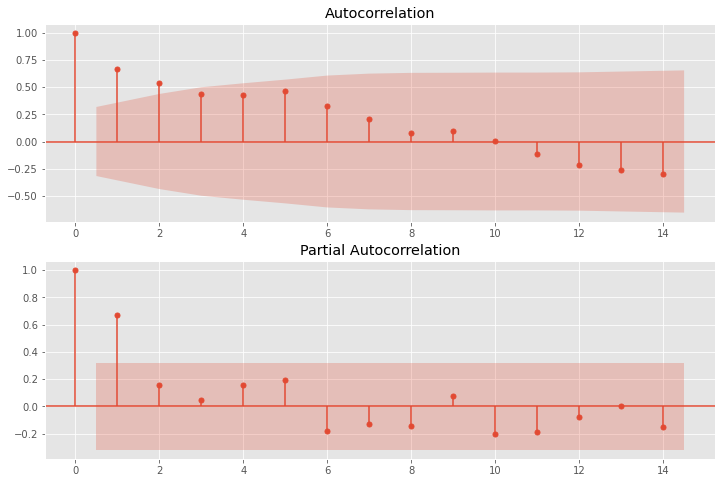

In [86]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(data, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(data, method='ywmle', lags=14, ax=plt.gca())
plt.show()

$x_{k} = 6059.1044 + 0.6988 \cdot x_{k-1} + ε_{k}$ </br>
$ a ∈ (-1; 1)$ </br>
$ε_{k} \~ N(4.737e+05)$ </br>
*sigma2* - оценка дисперсии члена ошибки

In [87]:
model = ARIMA(data, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   38
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -302.554
Date:                Mon, 25 Mar 2024   AIC                            611.107
Time:                        15:46:51   BIC                            616.020
Sample:                             0   HQIC                           612.855
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6059.1044    417.648     14.508      0.000    5240.529    6877.680
ar.L1          0.6988      0.149      4.692      0.000       0.407       0.991
sigma2      4.737e+05   1.09e+05      4.352      0.0

Проверка гипотезы о равенстве коэффициента 0: P>|z| </br>
В данной модели все не равны 0.

In [88]:
#  Существует другой рецепт идентификации моделей: считаем число столбцов, выходящих за границу доверительного интервала    
#  Это никак не обосновано, но так делают
#  Поэтому попробуем рассмотреть модель ARIMA(1,0,2)

model_2 = ARIMA(data, order=(1,0,2))
model_fit_2 = model_2.fit()
print(model_fit_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                   38
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -301.873
Date:                Mon, 25 Mar 2024   AIC                            613.746
Time:                        15:46:51   BIC                            621.933
Sample:                             0   HQIC                           616.659
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5994.8661    604.418      9.918      0.000    4810.228    7179.504
ar.L1          0.8792      0.193      4.558      0.000       0.501       1.257
ma.L1         -0.3227      0.293     -1.101      0.2

Коэффициенты при скользящем среднем на лаге 1 и 2 (ma.L1 и ma.L1) можно считать равными нулю по результатам теста.

Посмотрим на значения критерия качества моделей. </br>
**Log Likelihood** (логарифмическая функция правдоподобия): показывает максимальное значение логарифмической функции правдоподобия, которое было достигнуто для данной модели. Чем выше это значение, тем лучше модель соответствует данным. </br>
**AIC (Критерий информационного критерия Акаике)**: используется для сравнения статистических моделей. Он учитывает сложность модели (число параметров) и ее пригодность к данным. Чем ниже значение AIC, тем лучше модель.</br>
**BIC (Критерий информационного критерия Байеса)**: используется для сравнения статистических моделей. BIC штрафует модели за большее количество параметров сильнее, чем AIC.

Так как при сравнении показателей двух моделей разница в критериях <10, то будем считать, что разницы между ними нет.

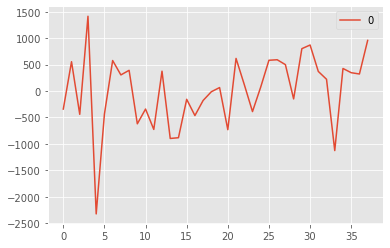

In [89]:
# Остатки ARIMA(1,0,0)
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()

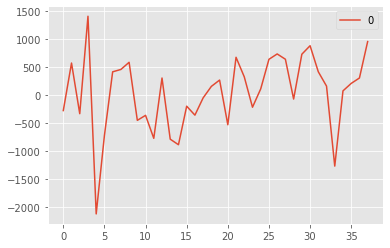

In [90]:
# Остатки ARIMA(1,0,2)
residuals_2 = pd.DataFrame(model_fit_2.resid)

residuals_2.plot()
plt.show()

Диапазоны у остатков примерно одинаковые, приницпиальной разницы между ними нет.

Ядерная оценка плотности - гистограммы остатков обеих моделей: (существенных отклонений от нормального распределения нет)

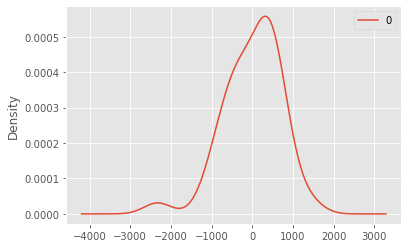

                 0
count    38.000000
mean      6.290562
std     698.588987
min   -2326.116818
25%    -425.327650
50%      98.558200
75%     480.440922
max    1414.155671


In [91]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

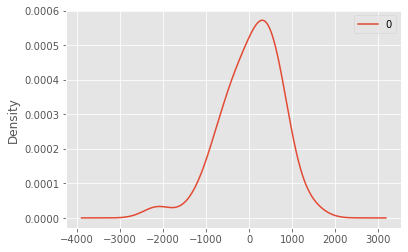

                 0
count    38.000000
mean     41.642799
std     684.329496
min   -2124.389193
25%    -352.998658
50%     156.767333
75%     542.782743
max    1407.703614


In [92]:
residuals_2.plot(kind='kde')
plt.show()
print(residuals_2.describe())

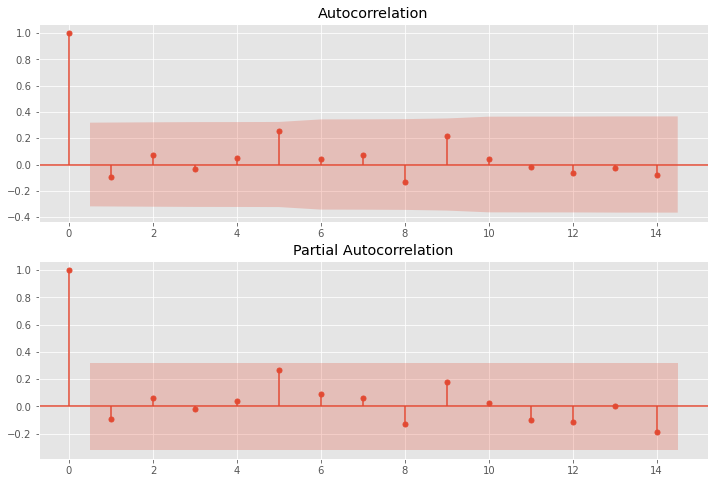

In [93]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(residuals, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=14, ax=plt.gca())
plt.show() 

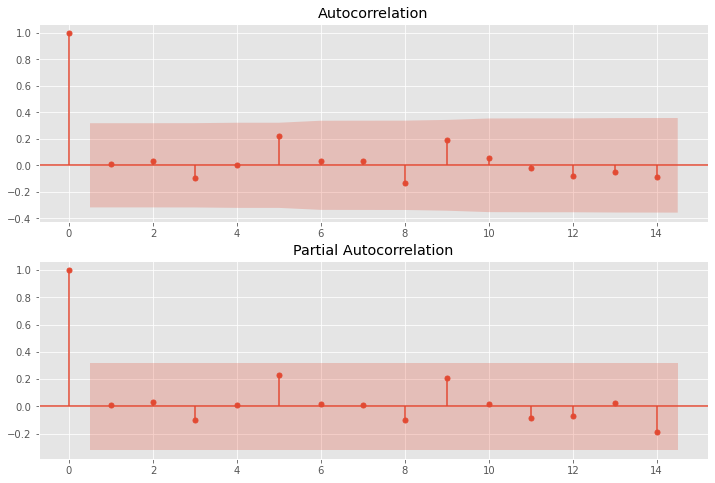

In [94]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(residuals_2, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(residuals_2, method='ywmle', lags=14, ax=plt.gca())
plt.show()

Остатки в обоих случаях - белый шум. Следовательно, обе модели имеют право на рассмотрение.

ARIMA(1,0,0) проще, поэтому берем ее:

In [95]:
data_fit = model_fit.predict(0, (38+4))
data_fit

0     6059.104440
1     5820.037337
2     6279.157619
3     5904.244329
4     6939.116818
5     5048.547548
6     5047.429447
7     5754.768182
8     6058.821812
9     6332.197542
10    5815.984220
11    5650.295607
12    5264.970000
13    5765.879313
14    5226.325630
15    4859.169167
16    5110.672043
17    5071.398740
18    5243.726079
19    5479.575539
20    5699.422176
21    5295.927426
22    5956.305914
23    6072.867958
24    5796.277687
25    5927.584690
26    6373.427521
27    6691.806822
28    6849.738608
29    6506.761083
30    6931.359992
31    7276.573720
32    7168.397434
33    6989.151844
34    5921.015846
35    6260.080018
36    6441.352166
37    6550.786315
38    7071.192516
39    6766.364962
40    6553.347439
41    6404.487979
42    6300.463021
Name: predicted_mean, dtype: float64

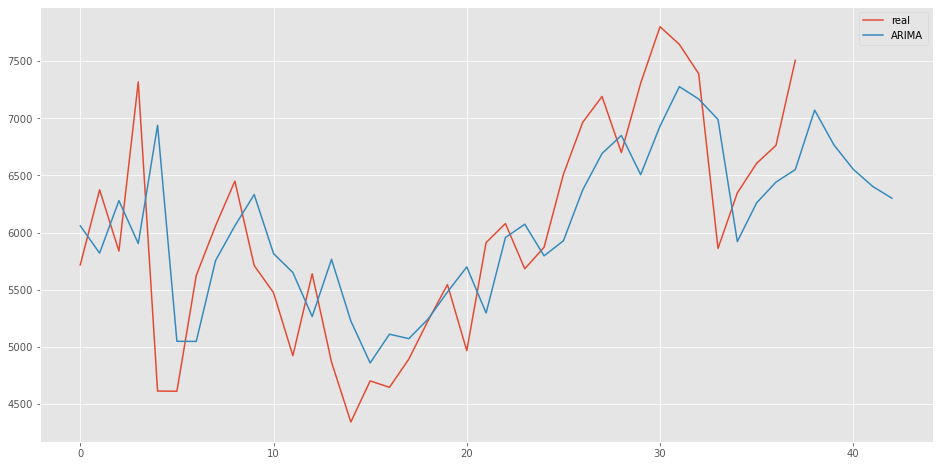

In [96]:
plt.figure(figsize=(16,8))
plt.plot(data, label='real')
plt.plot(data_fit, label='ARIMA')
plt.legend(loc='best')
plt.show()

In [97]:
import numpy as np

# Предсказанные значения моделью ARIMA
predicted_values = data_fit[0:38]

# Рассчет MAPE
mape = np.mean(np.abs((data - predicted_values) / data))
print("MAPE:", mape)

MAPE: 0.09450968950643261


In [98]:
import sklearn
mape_1 = sklearn.metrics.mean_absolute_percentage_error(data, predicted_values)
print("Средний процент ошибки прогнозирования :", mape_1)

Средний процент ошибки прогнозирования : 0.09450968950643261


Модели с MAPE менее 10% обычно считаются хорошими для многих задач прогнозирования